In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [2]:
def knn_euc(features,query,priorities,k):
	features=features.as_matrix()
	result=((features-query)**2)**priorities**3
	result=np.sqrt(np.sum(result,axis=1))

	ans=[]
	for i in range(len(result)):
		ans.append((result[i],i))
	ans.sort()
	ans=ans[:k]
	return ans

def dispf(temp,names):
	nafram=[]
	prfram=[]
	amfram=[]
	dist=[]
	for a,b in temp:
	    nafram.append(names.loc[b,"name"])
	    prfram.append(names.loc[b,'price'])
	    amfram.append(names.loc[b,'amenities'])
	    #dist.append(a)
	    
	ansframe=pd.DataFrame(data={'NAME':nafram ,'PRICE':prfram,'facilities':amfram})
	#pd.options.display.max_rows
	#pd.set_option('display.max_colwidth', -1)
	return ansframe


def price_filter(ansframe,price_limit):
	priceframe=ansframe[ansframe['PRICE']<=price_limit]
	return priceframe


def priority_filter(ansframe,ansfeatures,priorities,query):
	temp=knn_euc(ansfeatures,query,priorities,20)
	nafram=[]
	prfram=[]
	amfram=[]
	dist=[]
	for a,b in temp:
	    nafram.append(ansframe.iloc[b,0])
	    prfram.append(ansframe.iloc[b,1])
	    amfram.append(ansframe.iloc[b,2])
	    #dist.append(a)
	    
	pfilter_out=pd.DataFrame(data={'NAME':nafram ,'PRICE':prfram,'facilities':amfram})
	#pd.options.display.max_rows
	#pd.set_option('display.max_colwidth', -1)
	return pfilter_out


if __name__ == '__main__':
	features=pd.read_csv("features.csv")
	query=np.random.randint(0,2,features.shape[1])
	#query=np.array([1,1,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0])
	a=list(features.columns.values)
	qulist=[]
	for i in range(query.shape[0]):
	    if query[i]==1:
	        qulist.append(a[i])
	print("Input features:\n",qulist)
	##The initial priority assingment is all 1...makes calculation easier
	priorities=np.zeros(query.shape)

	for i in range(query.shape[0]):
		if query[i]==1:
			priorities[i]=np.random.randint(1,10)#10 corresponds to higher priority constraint while 1 is the lowest

	priority_threshold=np.nanmax(priorities)/2

	names=pd.read_csv("listings.csv",usecols=['id','name','price','amenities'])
	k=int(input("\nEnter No. of Recommedations: "))

	temp=knn_euc(features,query,priorities,k)

	##Creating new ansfeatures
	lt=[]
	for a,b in temp:
		lt.append(b)
	ansfeatures=features.iloc[lt]

	ansframe=dispf(temp,names)
	print(ansframe.iloc[:,:2]) #I have excluded out the amneties column for now

	print("Maximum Price: $%d"%(np.nanmax(ansframe.loc[:,'PRICE'])))
	print("Minimum Price: $%d"%(np.nanmin(ansframe.loc[:,'PRICE'])))


	#***Price filter**#
	price_limit=int(input("\nDo you want price filtering?..If no input 0 else please specify your budget: "))
	if price_limit !=0:
		priceframe=price_filter(ansframe,price_limit)
		print(priceframe.iloc[:,:2])


	#**Priority Filter**#
	choicep=input("\nDo you want to include only your high priority_feature: ")
	if choicep=='Y' or choicep =='y':
		priorities=np.where(priorities < priority_threshold ,0,priorities)
		prframe=priority_filter(ansframe,ansfeatures,priorities,query)
		print(prframe.iloc[:,:2])

Input features:
 ['24-Hour Check-in', 'Buzzer/Wireless Intercom', 'Carbon Monoxide Detector', 'Dog(s)', 'Doorman', 'Free Parking on Premises', 'Gym', 'Hair Dryer', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron', 'Kitchen', 'Lock on Bedroom Door', 'Pool', 'Shampoo', 'Smoke Detector']

Enter No. of Recommedations: 50
                                   NAME  PRICE
0         Best View in Downtown Seattle    357
1    Best Seattle Views! Private Suite!     75
2            Steps away from Lake Union    150
3    Westlake Ave Downtown Condos 1BD 4    183
4   Near Pike Place & Space Needle! MT2    165
5      2 Bed/2 Bath Tranquil View Oasis    197
6    2 Bedroom 2 Bathroom Rooftop Oasis    195
7     2 Bed 2 Bath Courtyard View Oasis    197
8   2BR VIEW! 98% Walk Score, FREE pkg!    183
9    99% WALKSCORE | FREE PRKNG | QUIET    105
10             99 Lux Pike's Market 2BD    350
11     Convention Place 1BD w/ Parking!    129
12             99 Amazing View Downtown    139
13  100Walk

In [3]:
calendar=pd.read_csv("calendar.csv")
calendar

,Unnamed: 0,X1,listing_id,date,available,price
0,1,1,241032,2016-01-04,True,85.0
1,2,2,241032,2016-01-05,True,85.0
2,3,3,241032,2016-01-06,False,NaN
3,4,4,241032,2016-01-07,False,NaN
4,5,5,241032,2016-01-08,False,NaN
5,6,6,241032,2016-01-09,False,NaN
6,7,7,241032,2016-01-10,False,NaN
7,8,8,241032,2016-01-11,False,NaN
8,9,9,241032,2016-01-12,False,NaN
9,10,10,241032,2016-01-13,True,85.0


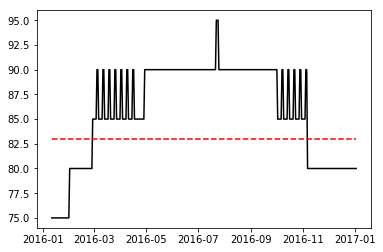

In [4]:
dates=calendar[calendar['listing_id']==4760472 ]

dates=dates[dates['available']==True]

datum=dates['date']

datum=datum.tolist()

datel = matplotlib.dates.datestr2num(datum)

plt.plot_date(datel, dates['price'],'k')

horiz_line_data = np.array([price_limit for i in range(len(datel))])
plt.plot(datel,horiz_line_data,'r--')
plt.show()

The above red line indicates the budget line underwhich the customercan book a house from Airbnb. As one might notice, his/her viable options of booking is only from 2016-01 to 2016-02 and 2016-11 from to 2016-12